In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

# load images

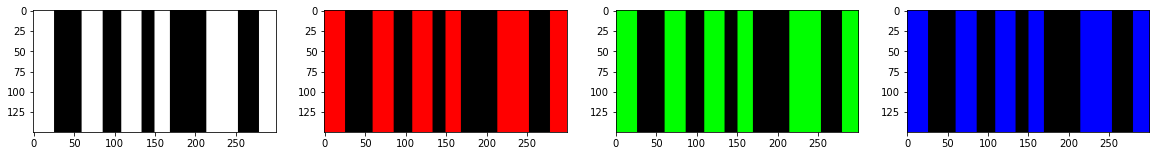

In [2]:
NUMBER_OF_SAMPLES = 4

images = []

for i in range(NUMBER_OF_SAMPLES):
    images.append(Image.open("img/banded/banded_{}.png".format(i)))

fig, axs = plt.subplots(1, NUMBER_OF_SAMPLES,
                       figsize=(20, 5))

for i in range(NUMBER_OF_SAMPLES):
    axs[i].imshow(images[i])

In [3]:
type(images[1])

PIL.PngImagePlugin.PngImageFile

In [4]:
images[1].size

(300, 150)

In [5]:
np.uint8(images[0]).shape

(150, 300, 3)

In [13]:
def img_to_bitmap(img, # a PIL.PngImagePlugin.PngImageFile
                  output = 'img.bitmap') :
    
    # convert the image to a numpy array
    np_img = np.uint8(img)
    
    with open(output, 'w') as text_file:
        # write dimension of the bitmap
        text_file.write('{}\n'.format(2))
        # write d lines as the numbers of 
        # top dimensional cubes in each dimensions
        for d in np_img.shape:
            text_file.write('{}\n'.format(d))
        
        # write the filtration of top dimensional cubes
        for j in range(np_img.shape[0]):
            for i in range(np_img.shape[1]):
                text_file.write('{} {} {}\n'.format(*[ c for c in np_img[j,i]]))
        

In [14]:
for i, img in enumerate(images):
    img_to_bitmap(img, 'bitmaps/banded_{}.bitmap'.format(i))

# add some noise

In [15]:
def add_noise(input_matrix, noise_min = -25, noise_max = +25, p = 0.1, seed=42):
    
    np.random.seed(seed)

    noise_matrix = np.random.randint(low=noise_min, high=noise_max, 
                                     size=input_matrix.shape, dtype=int)
    
    # we want to add noise only to p fraction of pixels
    sampling_matrix = np.random.uniform(low=0.0, high=1.0, size=input_matrix.shape)
    sampling_matrix[sampling_matrix <= p] = 1
    sampling_matrix[sampling_matrix < 1] = 0
    sampling_matrix = np.int16(sampling_matrix)
    
    return(np.clip( input_matrix + np.multiply(noise_matrix, sampling_matrix),
                    a_min=0, a_max=255))

In [16]:
noisy_img = add_noise(np.uint8(images[0]), seed=42, noise_min=-50, noise_max=50, p=1)

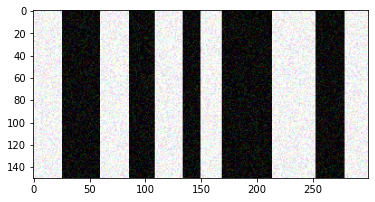

In [17]:
plt.imshow(noisy_img)

In [18]:
img_to_bitmap(noisy_img, 'bitmaps/banded_noisy.bitmap')

# one image from the cancer dataset

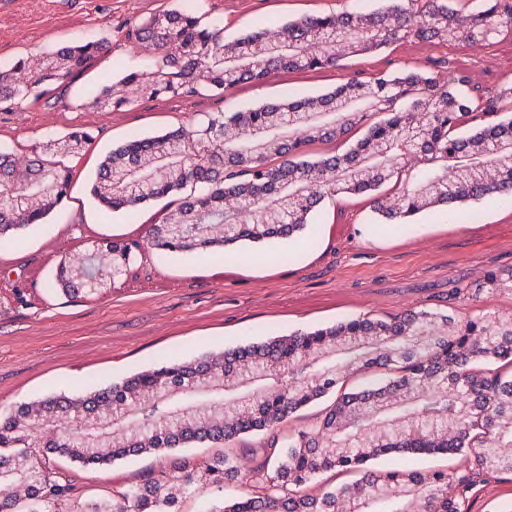

In [19]:
hist = Image.open("img/hist/1_1.tiff")
hist

In [20]:
hist.size

(512, 512)

In [21]:
img_to_bitmap(hist, 'bitmaps/hist_1_1.bitmap')

In [22]:
np.uint8(hist).shape

(512, 512, 3)